In [1]:
%matplotlib inline
#%matplotlib notebook

import numpy as np

from runners.vStirapRunner import ExperimentalRunner, Atom4lvl, Atom87Rb, Cavity, CavityBiref, LaserCoupling, CavityCoupling

# Section 1 - Simple 4-level atom tests

Here are some simple tests demonstrating a simple 4-level atom:
	- Three ground levels: 'gM', 'g', 'gP' with magnetic states -1, 0, +1 respectively.
	- One excited level: 'x' with magnetic state 0.
	- The transition strength between all ground levels and the exicted level are equal.

### 1.1 Vacuum Rabi oscillations

With no spontaneous emission, and g > $\kappa$ we observe a damped oscillation on the cavity coupled transition.

In [2]:
atom4lvl = Atom4lvl(gamma=0)
cav = Cavity(g = 5 * 2.*np.pi,
             kappa = 0. * 2.*np.pi)

cavity_coupling = CavityCoupling(g0=cav.g,
                                 g='gP', x='x',
                                 deltaC = 0 * 2*np.pi,
                                 deltaM=[1,-1],
                                 couple_off_resonance=False)

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=[],
                            cavity_couplings=cavity_coupling,
                            verbose=True)

No suitable pre-compiled Hamiltonian found.  Generating Cython file...

done.
	New file is ExperimentalRunner_Hamiltonian_0_75884.pyx.  Generated in 4.236 seconds.


In [3]:
psi0 = runner.ket('x',0)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

Running simulation with 501 timesteps...finished in 0.107 seconds


Photon emission: 0.0
Spontaneous emission: 0.0


(<matplotlib.figure.Figure at 0x110521208>,
 <matplotlib.figure.Figure at 0x11508e358>)

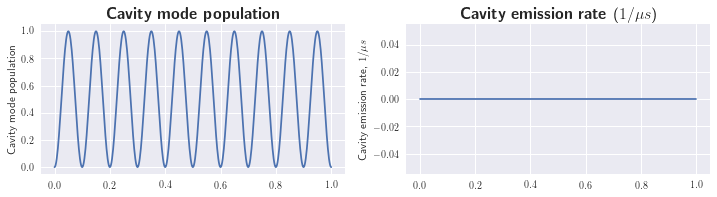

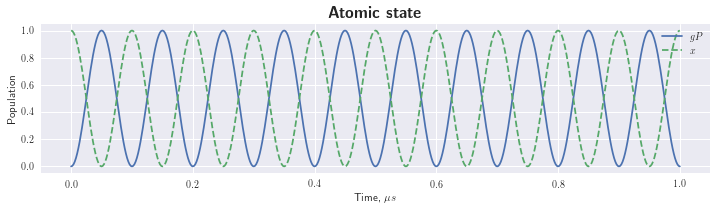

In [4]:
results.plot(['gP', 'x'])

Detuning the cavity from resonance results in smaller Rabi osciallations at a higher frequency.

Pre-compiled Hamiltonian, ExperimentalRunner_Hamiltonian_0_75884.pyx, is suitable to run this experiment.
Running simulation with 501 timesteps...finished in 0.082 seconds
Photon emission: 0.0


Spontaneous emission: 0.0


(<matplotlib.figure.Figure at 0x113de35f8>,
 <matplotlib.figure.Figure at 0x114ff2a58>)

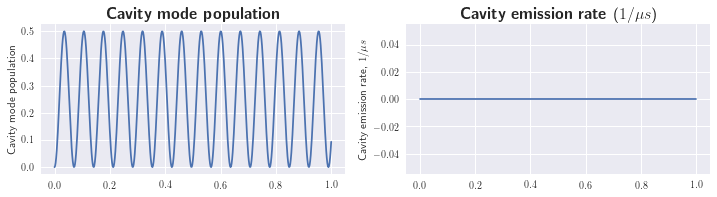

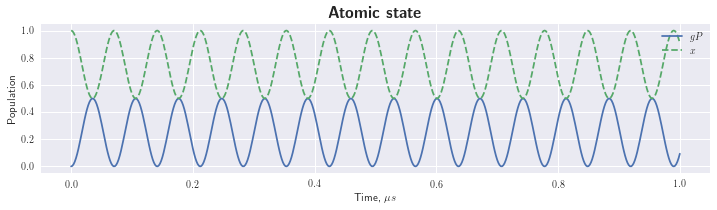

In [6]:
cavity_coupling.deltaC = 10 * 2*np.pi

psi0 = runner.ket('x',0)
t_length = 1
n_steps = 501

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=[],
                            cavity_couplings=cavity_coupling,
                            verbose=True)

results = runner.run(psi0, t_length, n_steps)

results.plot(['gP', 'x'])

The Rabi oscillations can be damped by both cavity decay ($\kappa$) and spontaneous emission ($\gamma$).

No suitable pre-compiled Hamiltonian found.  Generating Cython file...

done.
	New file is ExperimentalRunner_Hamiltonian_1_75884.pyx.  Generated in 3.765 seconds.
Running simulation with 501 timesteps...finished in 0.083 seconds
Photon emission: 0.736
Spontaneous emission: 0.249


(<matplotlib.figure.Figure at 0x117dafc50>,
 <matplotlib.figure.Figure at 0x11830f6d8>)

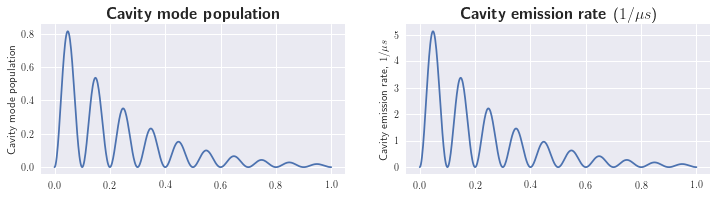

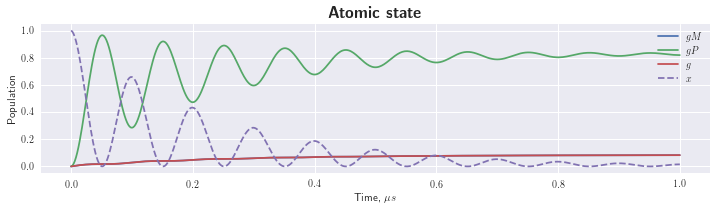

In [8]:
atom4lvl.gamma = 0.5* 2*np.pi
cav.kappa = 0.5 * 2*np.pi
cavity_coupling.deltaC = 0 * 2*np.pi

psi0 = runner.ket('x',0)
t_length = 1
n_steps = 501

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=[],
                            cavity_couplings=cavity_coupling,
                            verbose=True)

results = runner.run(psi0, t_length, n_steps)

results.plot()

### 1.2 Rabi oscillations

Of course we can drive Rabi oscillations with a laser too.

No suitable pre-compiled Hamiltonian found.  Generating Cython file...

done.
	New file is ExperimentalRunner_Hamiltonian_2_75884.pyx.  Generated in 3.927 seconds.
Running simulation with 501 timesteps...finished in 0.124 seconds
Photon emission: 0.0
Spontaneous emission: 0.0


(<matplotlib.figure.Figure at 0x115c7bbe0>,
 <matplotlib.figure.Figure at 0x11579fb00>)

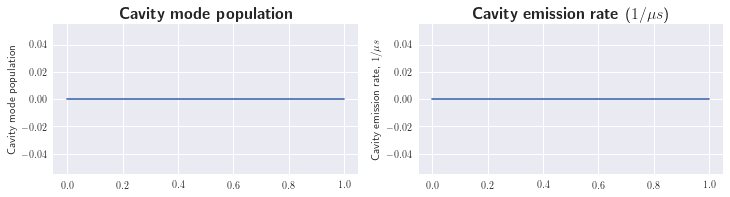

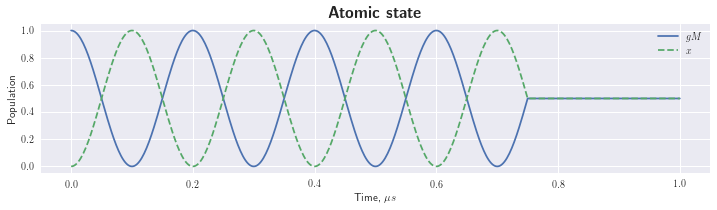

In [9]:
atom4lvl = Atom4lvl(gamma=0)
cav = Cavity(g = 5 * 2.*np.pi,
             kappa = 0. * 2.*np.pi)


# Our pulse will be on for 0.75us and then switch off.
# Note that couple_off_resonance=False means we only consider the 'gM' <-> 'x' transition coupled.
length_pulse = 0.75
laser_coupling = LaserCoupling(omega0=5 * 2*np.pi,
                               g='gM', x='x',
                               deltaL = 0 * 2*np.pi,
                               deltaM=[1,-1],
                               pulse_shape='np.piecewise(t, [t<length_pulse], [1,0])',
                               args_ham={"length_pulse":length_pulse},
                               couple_off_resonance=False
                               )

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=laser_coupling,
                            cavity_couplings=[],
                            verbose=True)

psi0 = runner.ket('gM',0)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

results.plot(['gM', 'x'])

Now let's see what happens if we don't magically ignore other transitions the laser (which drives both $\sigma^{+}$ and $\sigma^{-}$ transitions) can couple.

No suitable pre-compiled Hamiltonian found.  Generating Cython file...

done.
	New file is ExperimentalRunner_Hamiltonian_3_75884.pyx.  Generated in 4.066 seconds.
Running simulation with 501 timesteps...finished in 0.153 seconds
Photon emission: 0.0
Spontaneous emission: 0.0


(<matplotlib.figure.Figure at 0x118fffcc0>,
 <matplotlib.figure.Figure at 0x119358da0>)

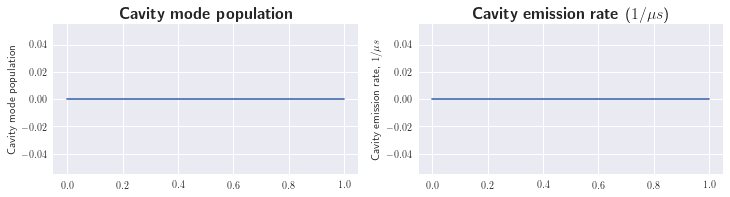

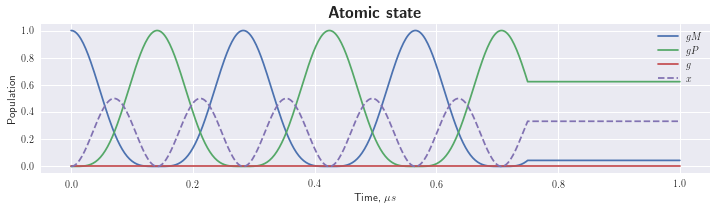

In [10]:
length_pulse = 0.75
laser_coupling = LaserCoupling(omega0=5 * 2*np.pi,
                               g='gM', x='x',
                               deltaL = 0 * 2*np.pi,
                               deltaM=[1,-1],
                               pulse_shape='np.piecewise(t, [t<length_pulse], [1,0])',
                               args_ham={"length_pulse":length_pulse},
                               couple_off_resonance=True # <-- This is the change!
                               )

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=laser_coupling,
                            cavity_couplings=[],
                            verbose=True)

psi0 = runner.ket('gM',0)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

results.plot()

Now let's also couple $\pi$ transitions and, for fun, start with a random population distribution across the three ground levels.

No suitable pre-compiled Hamiltonian found.  Generating Cython file...

done.
	New file is ExperimentalRunner_Hamiltonian_4_75884.pyx.  Generated in 4.273 seconds.
Running simulation with 501 timesteps...finished in 0.188 seconds


Photon emission: 0.0
Spontaneous emission: 0.0


(<matplotlib.figure.Figure at 0x11897eeb8>,
 <matplotlib.figure.Figure at 0x1195bc908>)

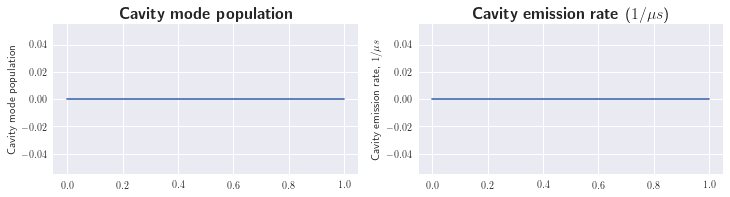

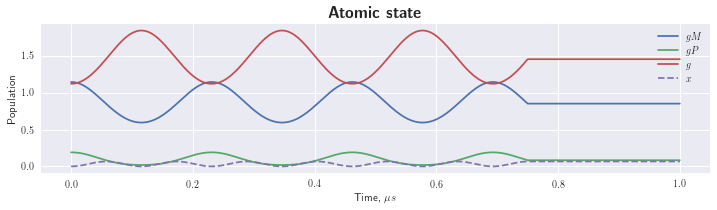

In [11]:
length_pulse = 0.75
laser_coupling = LaserCoupling(omega0=5 * 2*np.pi,
                               g='gM', x='x',
                               deltaL = 0 * 2*np.pi,
                               deltaM=[1,0,-1],  # <-- Let's couple pi transitions too!
                               pulse_shape='np.piecewise(t, [t<length_pulse], [1,0])',
                               args_ham={"length_pulse":length_pulse},
                               couple_off_resonance=True
                               )

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=laser_coupling,
                            cavity_couplings=[],
                            verbose=True)

v = np.random.randn(3)
v /= np.sqrt(np.linalg.norm(v))

psi0 = v[0]*runner.ket('gM',0) + v[1]*runner.ket('g',0) + v[2]*runner.ket('gP',0)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

results.plot()

### 1.3 v-Stirap

No suitable pre-compiled Hamiltonian found.  Generating Cython file...

done.
	New file is ExperimentalRunner_Hamiltonian_5_75884.pyx.  Generated in 4.071 seconds.
Running simulation with 501 timesteps...finished in 0.121 seconds
Photon emission: 0.997
Spontaneous emission: 0.0


(<matplotlib.figure.Figure at 0x1196e43c8>,
 <matplotlib.figure.Figure at 0x11990a9e8>)

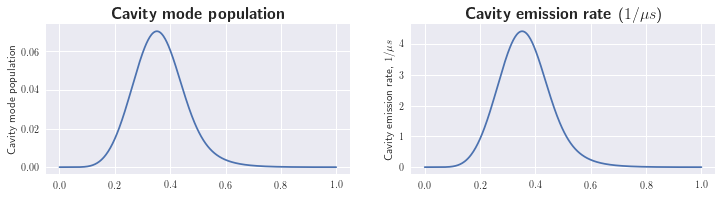

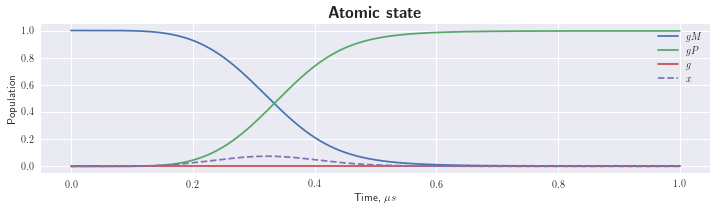

In [12]:
atom3lvl = Atom4lvl(gamma=0)
cav = Cavity(g = 5 * 2.*np.pi,
             kappa = 5. * 2.*np.pi)

length_pulse = 1
laser_coupling = LaserCoupling(omega0=5 * 2*np.pi,
                               g='gM', x='x',
                               deltaL = 0 * 2*np.pi,
                               deltaM=[1,-1],
                               pulse_shape='np.piecewise(t, [t<length_pulse], [np.sin((np.pi/length_pulse)*t)**2,0])',
                               args_ham={"length_pulse":length_pulse},
                               couple_off_resonance=False
                               )

cavity_coupling = CavityCoupling(g0=cav.g,
                                 g='gP', x='x',
                                 deltaC = 0 * 2*np.pi,
                                 deltaM=[1,-1],
                                 couple_off_resonance=False)

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=laser_coupling,
                            cavity_couplings=cavity_coupling,
                            verbose=True)

psi0 = runner.ket('gM',0)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

results.plot()

### 1.4 Spontaneous decay

In [21]:
atom4lvl = Atom4lvl(gamma=3*np.pi)
cav = Cavity(g = 5 * 2.*np.pi,
             kappa = 5. * 2.*np.pi)
laser_coupling = LaserCoupling(omega0=0 * 2*np.pi,
                               g='gM', x='x',
                               deltaL = 0 * 2*np.pi,
                               deltaM=[1,-1],
                               pulse_shape='1',
                               args_ham={"length_pulse":length_pulse},
                               couple_off_resonance=False
                               )

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=laser_coupling,
                            cavity_couplings=[],
                            verbose=True)

psi0 = runner.ket('x',0)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

results.plot()

NameError: name 'length_pulse' is not defined

### 1.5 Customising the atom

Here we demonstrate how the atom object can be modified.

#####  1.5.1 Configured energy levels

As introduced above, the Atom4lvl has three ground states and one excited state, and so is already a fairly simple system.  However, if you want to further reduce the system a subset of the these levels can be configured by the 'configured_states' parameter.

It is also possible to directly modify the 'g_states' and 'x_states' dictionaries, however this is duplicated functionality with 'configured_states' and so the use of the later is recommended.

In [2]:
atom4lvl = Atom4lvl(gamma=0,
                    configured_states=['gP','x'])
cav = Cavity(g = 5 * 2.*np.pi,
             kappa = 0. * 2.*np.pi)

cavity_coupling = CavityCoupling(g0=cav.g,
                                 g='gP', x='x',
                                 deltaC = 0 * 2*np.pi,
                                 deltaM=[1,-1],
                                 couple_off_resonance=False)

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=[],
                            cavity_couplings=cavity_coupling,
                            verbose=True)

psi0 = runner.ket('x',0)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

results.plot()

AttributeError: 'list' object has no attribute 'difference'

# Section 2 - 4-level atom with birefringent cavity

### 2.1 Degenerate polarisation modes (i.e. 1.1 revisited)

A sensible sanity check is that we get the same results as we did in section 1 (specifically 1.1) when our 'birefringent' cavity has no polarisation mode splitting ($\Delta_P=0$) and equal decay rates of orthogonal polarisations from the cavity ($\kappa_1 = \kappa_2$).

With no cavity decay or spontaneous emission.

Pre-compiled Hamiltonian, ExperimentalRunner_Hamiltonian_4_79109.pyx, is suitable to run this experiment.
Running simulation with 501 timesteps...finished in 0.093 seconds
Photon emission: 0.0


Photon emission in |X>, |Y>: 0.0 0.0
Spontaneous emission: 0.0


(<matplotlib.figure.Figure at 0x12a220048>,
 <matplotlib.figure.Figure at 0x12ca98cf8>)

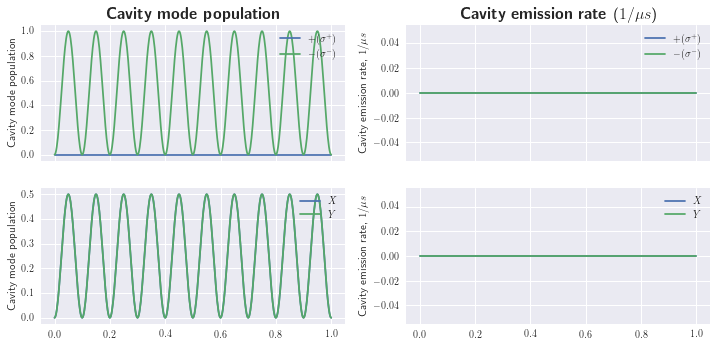

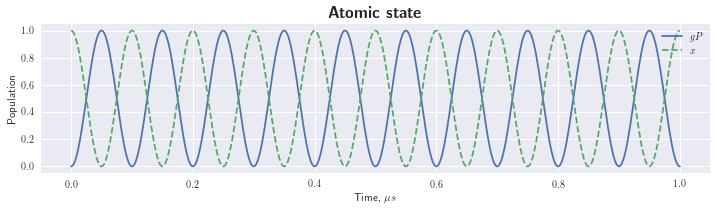

In [19]:
atom4lvl = Atom4lvl(gamma=0.0* 2*np.pi)
cav = CavityBiref(g = 5 * 2.*np.pi,
                  kappa1 = 0.0 * 2.*np.pi,
                  kappa2 = 0.0 * 2.*np.pi)

cavity_coupling = CavityCoupling(g0=cav.g,
                                 g='gP', x='x',
                                 deltaC = 0 * 2*np.pi,
                                 deltaM=[1,-1],
                                 couple_off_resonance=False)

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=[],
                            cavity_couplings=cavity_coupling,
                            verbose=True)

psi0 = runner.ket('x',0, 0)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

results.plot(['gP','x'])

Damped vacuum Rabi oscillations.

Pre-compiled Hamiltonian, ExperimentalRunner_Hamiltonian_0_77053.pyx, is suitable to run this experiment.
Running simulation with 501 timesteps...finished in 0.092 seconds


Photon emission: 0.736
Photon emission in |X>, |Y>: 0.368 0.368
Spontaneous emission: 0.249


(<matplotlib.figure.Figure at 0x1205f5048>,
 <matplotlib.figure.Figure at 0x12103a9b0>)

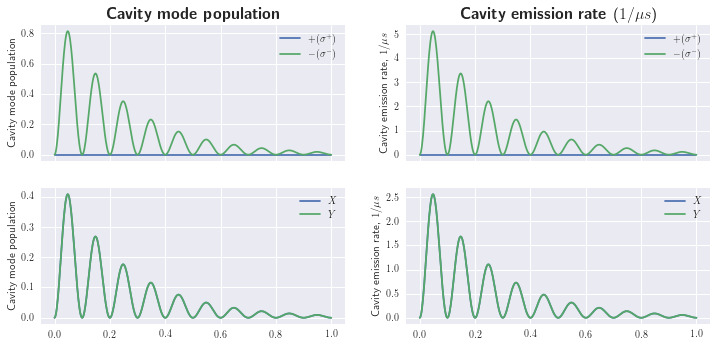

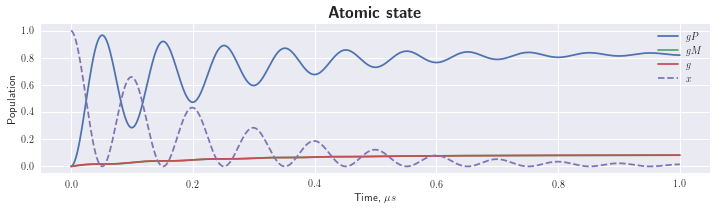

In [6]:
atom4lvl = Atom4lvl(gamma=0.5* 2*np.pi)
cav = CavityBiref(g = 5 * 2.*np.pi,
                  kappa1 = 0.5 * 2.*np.pi,
                  kappa2 = 0.5 * 2.*np.pi)

cavity_coupling = CavityCoupling(g0=cav.g,
                                 g='gP', x='x',
                                 deltaC = 0 * 2*np.pi,
                                 deltaM=[1,-1],
                                 couple_off_resonance=False)

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=[],
                            cavity_couplings=cavity_coupling,
                            verbose=True)

psi0 = runner.ket('x',0, 0)
t_length = 1
n_steps = 501

results = runner.run(psi0, t_length, n_steps)

results.plot()

Pre-compiled Hamiltonian, ExperimentalRunner_Hamiltonian_1_79109.pyx, is suitable to run this experiment.
Running simulation with 1001 timesteps...finished in 0.142 seconds


Photon emission: 0.0
Photon emission in |X>, |Y>: 0.0 0.0
Spontaneous emission: 0.0


(<matplotlib.figure.Figure at 0x12b1357b8>,
 <matplotlib.figure.Figure at 0x12b199c50>)

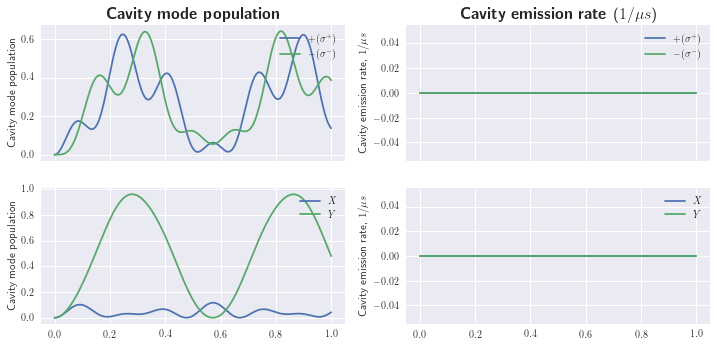

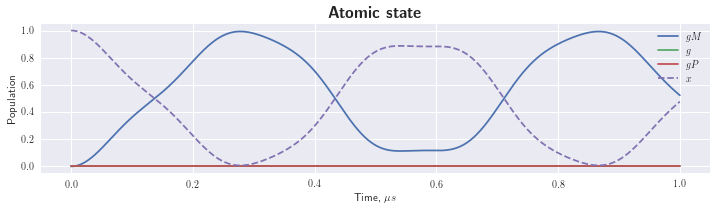

In [16]:
atom4lvl = Atom4lvl(gamma=0.* 2*np.pi,
                    transition_strengths={'x': {'g': 0, 'gM': 1, 'gP': 0}},
                    #configured_states=['gM','x']
                    )
cav = CavityBiref(g = 1.25 * 2.*np.pi,
                  kappa1 = 0. * 2.*np.pi,
                  kappa2 = 0. * 2.*np.pi,
                  deltaP= 5 * 2.*np.pi,
                  R_CL = np.matrix([[1, 0],
                                    [0, 1]]))

cavity_coupling = CavityCoupling(g0=cav.g,
                                 g='gM', x='x',
                                 deltaC = 2.5 * 2*np.pi,
                                 deltaM=[1,-1],
                                 couple_off_resonance=False)

runner = ExperimentalRunner(atom=atom4lvl,
                            cavity=cav,
                            laser_couplings=[],
                            cavity_couplings=cavity_coupling,
                            verbose=True)

psi0 = runner.ket('x',0, 0)
t_length = 1
n_steps = 1001

results = runner.run(psi0, t_length, n_steps)

results.plot()

In [17]:
runner.compiled_hamiltonian.hams

[[Quantum object: dims = [[4, 2, 2], [4, 2, 2]], shape = (16, 16), type = oper, isherm = True
  Qobj data =
  [[ 0.          0.          0.          0.          0.          0.          0.
     0.          0.          0.          0.          0.          0.          0.
     0.          0.        ]
   [ 0.          0.          0.          0.          0.          0.          0.
     0.          0.          0.          0.          0.          0.          0.
     0.          0.        ]
   [ 0.          0.          0.          0.          0.          0.          0.
     0.          0.          0.          0.          0.         -0.70710678
     0.          0.          0.        ]
   [ 0.          0.          0.          0.          0.          0.          0.
     0.          0.          0.          0.          0.          0.
    -0.70710678  0.          0.        ]
   [ 0.          0.          0.          0.          0.          0.          0.
     0.          0.          0.          0.     

In [8]:
runner.compiled_hamiltonian.atom.configured_states

['gM', 'x', 'gM', 'g', 'gP', 'x']

# 87Rb atom tests

In [7]:
i=np.complex(0,1)

atomRb = Atom87Rb(x_zero_energy_state='x1', params_file='./params/exp_params_0MHz.csv')

cav = CavityBiref(g= 10 * 2*np.pi,
                  kappa1 = 2 * 2.*np.pi,
                  kappa2 = 2 * 2.*np.pi,
                  deltaP = 0 * 2*np.pi,
                  R_CL =  np.matrix([[1, 0],
                                     [0, 1]]),
                  R_ML = np.sqrt(1 / 2) * np.matrix([[1, i],
                                                     [i, 1]]))

In [8]:
length_pulse = 1
laser_coupling = LaserCoupling(omega0=20 * 2*np.pi,
                               g='g1M', x='x1',
                               deltaL = 0 * 2*np.pi,
                               deltaM=[1,-1],
                               pulse_shape='np.piecewise(t, [t<length_pulse], [np.sin((np.pi/length_pulse)*t)**2,0])',
                               args_ham={"length_pulse":length_pulse},
                               couple_off_resonance=False
                               )

cavity_coupling = CavityCoupling(g0=cav.g,
                                 g='g1P', x='x1',
                                 deltaC = 0 * 2*np.pi,
                                 deltaM=[1,-1],
                                 couple_off_resonance=False)

In [10]:
runner = ExperimentalRunner(atom=atomRb,
                            cavity=cav,
                            laser_couplings=[],
                            cavity_couplings=cavity_coupling,
                            verbose=True)

Pre-compiled Hamiltonian, ExperimentalRunner_Hamiltonian_1_65160.pyx, is suitable to run this experiment.


In [11]:
psi0 = runner.ket('x1',0,0)
t_length = length_pulse
n_steps = 101

results = runner.run(psi0, t_length, n_steps)

Running simulation with 101 timesteps...

finished in 0.408 seconds


Photon emission: 26.946
Photon emission in |X>, |Y>: 13.473 13.473
Spontaneous emission: 2.017


(<matplotlib.figure.Figure at 0x1276830b8>,
 <matplotlib.figure.Figure at 0x126898898>)

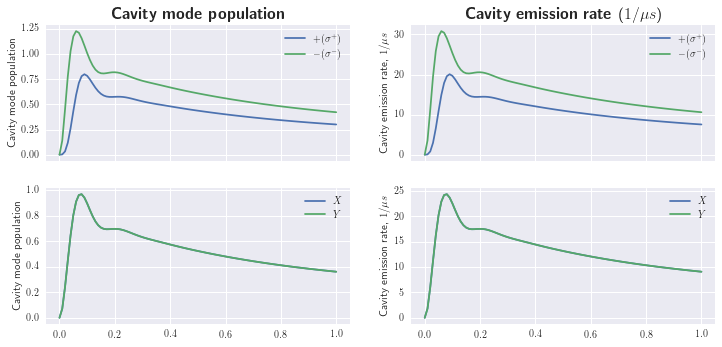

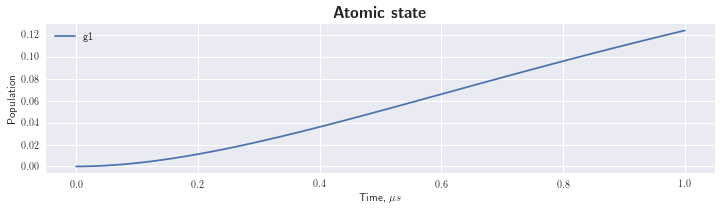

In [12]:
results.plot(atom_states=['g1'])

Photon emission: 26.946
Photon emission in |X>, |Y>: 13.473 13.473
Spontaneous emission: 2.017


(<matplotlib.figure.Figure at 0x128da1978>,
 <matplotlib.figure.Figure at 0x128f51128>)

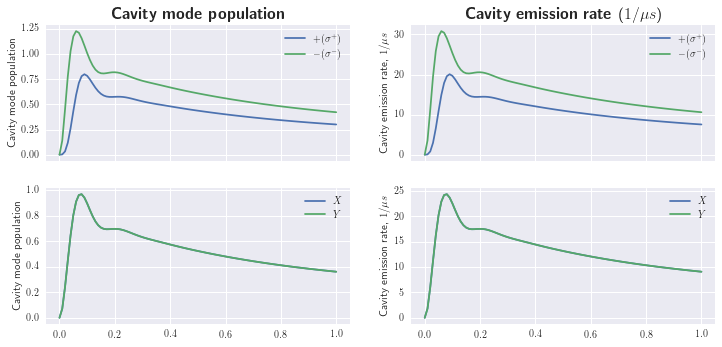

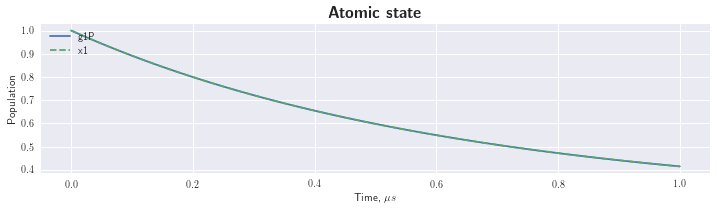

In [13]:
results.plot()

In [2]:
atomRb = Atom87Rb()

NameError: name 'runnner' is not defined